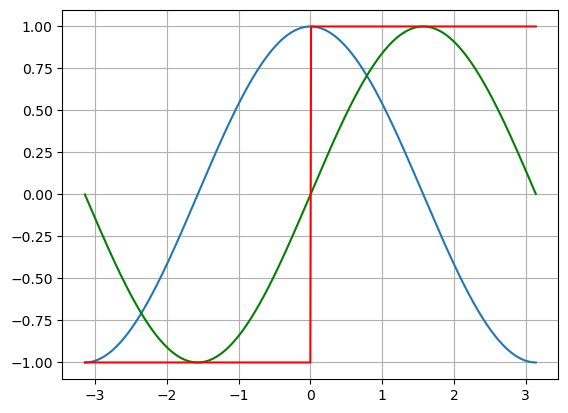

In [41]:
# https://www.mathsisfun.com/calculus/fourier-series.html
import numpy as np
import matplotlib.pyplot as plt


def sin_f(mag=1, freq=1):
    
    def _sin(x):
        return mag * np.sin(freq * x)
    
    return _sin


def cos_f(mag=1, freq=1):
    
    def _cos(x):
        return mag * np.cos(freq * x)
    
    return _cos


x = np.arange(-np.pi, np.pi, 0.01)
y_cos = cos_f()(x)
y_sin = sin_f()(x)
y_square = np.sign(sin_f()(x))

plt.plot(x, y_cos)
plt.plot(x, y_sin, 'green')
plt.plot(x, y_square, 'red')

plt.grid()
plt.show()

In [55]:
import scipy.integrate as integrate

# a0
a0_pre = integrate.quad(sin_f(freq=1), -np.pi, np.pi)[0]
a0 = a0_pre / 2 * np.pi
print('a0', a0)

a1_pre = integrate.quad(cos_f(freq=1), -np.pi, 0)[0] * (-1) + integrate.quad(cos_f(freq=1), 0, np.pi)[0]
a1 = a1_pre / np.pi
print('a1', a1)

a2_pre = integrate.quad(cos_f(freq=2), -np.pi, 0)[0] * (-1) + integrate.quad(cos_f(freq=2), 0, np.pi)[0]
a2 = a2_pre / np.pi
print('a2', a2)

a3_pre = integrate.quad(cos_f(freq=3), -np.pi, 0)[0] * (-1) + integrate.quad(cos_f(freq=3), 0, np.pi)[0]
a3 = a3_pre / np.pi
print('a3', a3)

a4_pre = integrate.quad(cos_f(freq=4), -np.pi, 0)[0] * (-1) + integrate.quad(cos_f(freq=4), 0, np.pi)[0]
a4 = a4_pre / np.pi
print('a4', a4)

# b1, b2, b3, ...
b1_pre = integrate.quad(sin_f(freq=1), -np.pi, 0)[0] * (-1) + integrate.quad(sin_f(freq=1), 0, np.pi)[0]
b1 = b1_pre / np.pi
print('b1', b1)

b2_pre = integrate.quad(sin_f(freq=2), -np.pi, 0)[0] * (-1) + integrate.quad(sin_f(freq=2), 0, np.pi)[0]
b2 = b2_pre / np.pi
print('b2', b2)

b3_pre = integrate.quad(sin_f(freq=3), -np.pi, 0)[0] * (-1) + integrate.quad(sin_f(freq=3), 0, np.pi)[0]
b3 = b3_pre / np.pi
print('b3', b3)

b4_pre = integrate.quad(sin_f(freq=4), -np.pi, 0)[0] * (-1) + integrate.quad(sin_f(freq=4), 0, np.pi)[0]
b4 = b4_pre / np.pi
print('b4', b4)

a0 0.0
a1 0.0
a2 0.0
a3 0.0
a4 0.0
b1 1.2732395447351628
b2 7.071258840557644e-17
b3 0.42441318157838753
b4 -4.912666718205075e-17


(629,)


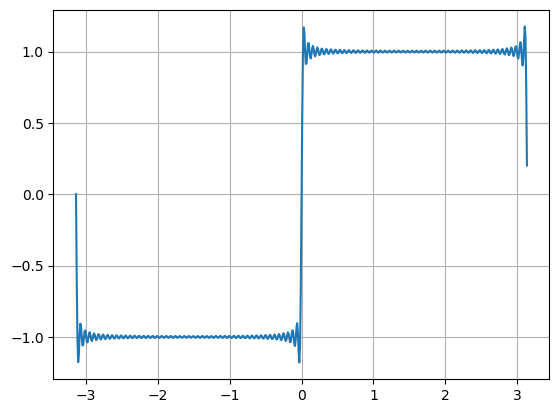

In [67]:
coefs = []
for i in range(50):
    freq = 1 + i*2
    new_coef = (integrate.quad(sin_f(freq=freq), -np.pi, 0)[0] * (-1) 
                + integrate.quad(sin_f(freq=freq), 0, np.pi)[0])
    new_coef = new_coef / np.pi
    coefs.append(new_coef)

x = np.arange(-np.pi, np.pi, 0.01)
print(x.shape)

y = np.zeros(shape=x.shape)
for i in range(50):
    freq = 1 + i*2
    coef = coefs[i]
    inc_vec = sin_f(freq=freq)(x) * coef
    y = y + inc_vec
    

plt.plot(x, y)
plt.grid()
plt.show()

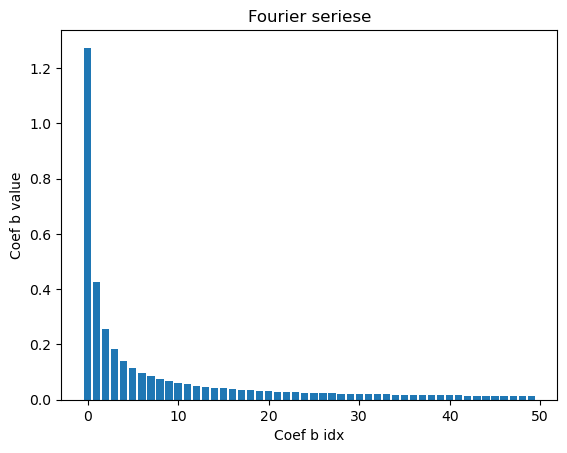

In [69]:
plt.bar(list(range(50)), coefs)
 
plt.xlabel("Coef b idx")
plt.ylabel("Coef b value")
plt.title("Fourier seriese")
plt.show()